# Check decision boundary of model

- focus on FN & FP


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

PATH = "/home/WUR/katz001/PROJECTS/myaReg-genderDifferences"

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append(f"{PATH}/scripts")

from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay
from func_preprocess import read_data
import pickle

sns.set_theme(style="white", font_scale=1.4, context="paper") #palette=sns.husl_palette(n_colors=8)

In [2]:
### Read dataset and split
''' 
Prepare data --> change here for different setups!
'''
target = "gender"
percentBoruta = 100
n_iter = 300

varSet = "fullRegistry"
varFolder = "boruta"
vars = f"{target}_bootstrapped_iterativeBoruta_{percentBoruta}perc"    

# varSet = "fullRegistry"
# varFolder = "manual"
# vars = "partiallyValidated"

In [3]:
resultsPath = f"{PATH}/results/30_internalValidation/{varSet}/{vars}"
folderFigures = f"{PATH}/figures/30_internalValidation/{varSet}/{vars}"
folderFigures_publication = f"{PATH}/figures/publication/{varSet}"
os.makedirs(folderFigures, exist_ok=True)

In [4]:
''' 
Split data
'''
data = read_data(PATH,FILENAME=f"{varSet}")
X = data.drop(target, axis=1)
y = data[target]



LOADING DATA


In [5]:
''' Load predProba'''
model = 'rfc'
with open(f'{resultsPath}/bootstrap_{model}_n{n_iter}_predProba.pickle', 'rb') as f:
    dic_proba = pickle.load(f)
data_proba = pd.DataFrame.from_dict(dic_proba, orient="index").sort_index().T

In [6]:
y_proba= data_proba.mean(axis=1).sort_index()
tru = y.loc[data_proba.index] 

df = pd.concat([y_proba, tru], axis=1)
df.columns = ['y_predProb', 'y_true']

In [7]:
df["y_true"]

002D7Y7Z    1
002G71A3    0
00C4EK1J    0
01M51DX3    0
02U71U3N    1
           ..
ZWUVEM64    0
ZXX7E4X4    1
ZY91U2Q2    1
ZZEHZKCR    1
ZZZ1Y1R6    0
Name: y_true, Length: 1814, dtype: Int64

## Plot

In [8]:
import matplotlib.colors
cmap = sns.color_palette(["royalblue","indianred"])
cmap

[(0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
 (0.803921568627451, 0.3607843137254902, 0.3607843137254902)]

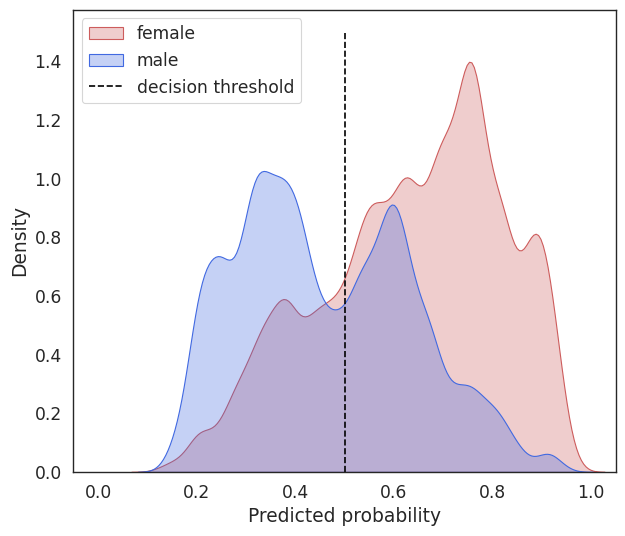

In [9]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,6))
sns.kdeplot(data=df, x="y_predProb", bw_adjust=0.5, hue="y_true", fill=True, common_norm=True, alpha=0.3, ax=ax1, shade=True, palette=cmap) #label="."
ax1.vlines(0.5, 0,1.5, linestyles="dashed", color="black", label="Decision threshold")

ax1.set_xlim(-0.05,1.05)
ax1.set_xlabel("Predicted probability")

ax1.legend(labels=["female", "male", "decision threshold"], loc=2)


fig.savefig(f"{folderFigures_publication}/densityDistribution.png", dpi=300)

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
# sns.kdeplot(data=df, x="y_predProb", bw_adjust=0.5, hue="y_true", fill=True, common_norm=True, alpha=0.2, ax=ax1)
# #sns.histplot(data=df, x="y_predProb", hue="y_true", ax=ax2)


# RocCurveDisplay.from_predictions(
#     df["y_true"],
#     df["y_predProb"],
#     pos_label=1,
#     name=f"ROC",
#     color=sns.color_palette("tab10")[4],
#     ax=ax2)

# PrecisionRecallDisplay.from_predictions(df["y_true"],  
#                                         df["y_predProb"], 
#                                         name=f"PR",
#                                         pos_label=1,
#                                         color=sns.color_palette("tab10")[2],
#                                         #plot_chance_level=True,
#                                         ax=ax2)
# ax1.vlines(0.5, 0,1.8, linestyles="dashed", color="firebrick")

# ax1.set_xlim(-0.1,1)
# ax2.set_xlim(-0.1,1)
# fig.suptitle(f"")
# #fig.savefig(f"{PATH_fig}/densityDistribution.png", dpi=300)